In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
#Loading the dataset
data = pd.read_csv("https://raw.githubusercontent.com/nunnarilabs/ml/master/heart.csv")

In [38]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
data.shape

(303, 14)

In [40]:
#Splitting the dataset into training and test samples

from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [41]:
#Classifying the predictors and target

X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [42]:
#Initializing Support Vector Machine and fitting the training data

from sklearn.svm import SVC
classifier = SVC(kernel='rbf',gamma=0.6, random_state = 1)
classifier.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.6, kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [43]:
#Predicting the classes for test set

Y_pred = classifier.predict(X_test)

In [44]:
#Attaching the predictions to test set for comparing

test_set["Predictions"] = Y_pred
test_set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Predictions
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0,0
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1,0
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0,0
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0,0
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0,2
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0,0


In [45]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
cm = confusion_matrix(Y_test,Y_pred)
print(cm)
print(metrics.classification_report(Y_test,Y_pred))
accuracy = float(cm.diagonal().sum())/len(Y_test)

[[25  3  4  0]
 [ 6  0  1  0]
 [ 9  2  6  0]
 [ 4  0  1  0]]
              precision    recall  f1-score   support

           0       0.57      0.78      0.66        32
           1       0.00      0.00      0.00         7
           2       0.50      0.35      0.41        17
           3       0.00      0.00      0.00         5

    accuracy                           0.51        61
   macro avg       0.27      0.28      0.27        61
weighted avg       0.44      0.51      0.46        61



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
#Calculate the accuracy using the confusion matrix as follows:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
print("\nAccuracy Of SVM For The Given Dataset:", accuracy)


Accuracy Of SVM For The Given Dataset: 0.5081967213114754


In [47]:
#Visualizing the classifier
#Encode the classes ‘sex’ and ‘chol’ into numericals using the label encoder


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

In [48]:
#After encoding, fit the encoded data to the SVM

from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state = 1)
classifier.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [49]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

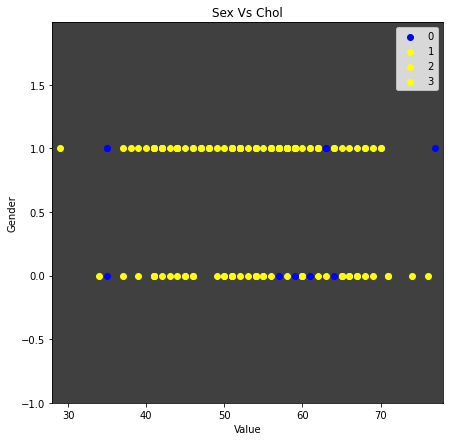

In [50]:
#Visualizing the classifier

plt.figure(figsize = (7,7))
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01), np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Sex Vs Chol')
plt.xlabel('Value')
plt.ylabel('Gender')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

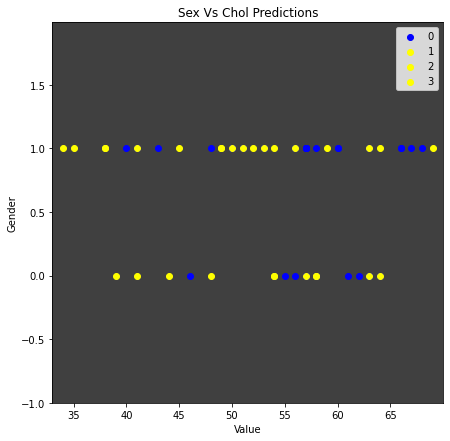

In [51]:
#Visualizing the predictions

plt.figure(figsize = (7,7))
X_set, y_set = X_test, Y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha = 0.75, cmap = ListedColormap(('black', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],c = ListedColormap(('blue', 'yellow'))(i), label = j)
plt.title('Sex Vs Chol Predictions')
plt.xlabel('Value')
plt.ylabel('Gender')
plt.legend()
plt.show()